```
First, let's analyze some text...



































...
```

# “Each of us is full of shit in our own special way. We are all shitty little snowflakes dancing in the universe.” 
― Lewis Black, Me of Little Faith

<img src="files/don.png">

# Alice's Case

<img src="files/plus.png" width="60%">

# Overview of Taggers/Parsers 


Tagging and Parsing into Trees is different:

* Tagging: Tagging every word [fast]
* Parsing: Tagging and puts into Tree [slow]
* Chunking: Gives pieces of Trees [medium]
* POSH Rules:  *Special* fact and deap and context aware [amazing]

Other important *words*:

* Probabilistic Parsing
* Chart Parsing
    * Grammer
    * Strategy

*NLTK is the mother of all mother of NLP*

so many parsers:

* pyStatParser (python yay!, little slow, but fun)
* Stanford (popular) and btw, online! => http://nlp.stanford.edu:8080/parser/
* TextBlob (python yay! NLTK simplification)
* clips Pattern (python yay!)
* MaltParser (java 1.8)
* spaCy (pyython yay!)

# Example Parsers/Taggers 

In [2]:
sent = "Each of us is full of stuff in our own special way"

# setup display for demo
%matplotlib inline
import os
os.environ['DISPLAY'] = 'localhost:1'

## pyStatParser

In [ ]:
from stat_parser import Parser
parser = Parser()
parser.parse(sent)
tree = parser.parse(sent) # returns nltk Tree instance
tree

# stanford POS

In [12]:
os.environ['CLASSPATH'] = "stanford-pos"
os.environ['STANFORD_MODELS'] = "stanford-pos"
from nltk.tag import StanfordPOSTagger
st = StanfordPOSTagger('english-bidirectional-distsim.tagger') 
st.tag(sent.split()) 

[('Each', 'DT'),
 ('of', 'IN'),
 ('us', 'PRP'),
 ('is', 'VBZ'),
 ('full', 'JJ'),
 ('of', 'IN'),
 ('stuff', 'NN'),
 ('in', 'IN'),
 ('our', 'PRP$'),
 ('own', 'JJ'),
 ('special', 'JJ'),
 ('way', 'NN')]

In [4]:
command =  ['/usr/bin/java', '-mx1000m', '-cp', './stanford-postagger.jar', 'edu.stanford.nlp.tagger.maxent.MaxentTagger', '-model', 'english.all.3class.distsim.crf.ser.gz', '-textFile', '/var/folders/zt/0kh07_ls7m53vnmr_kxkn2wdz82_00/T/tmpao2buglj', '-tokenize', 'false', '-outputFormatOptions', 'keepEmptySentences', '-encoding', 'utf8']

In [5]:
" ".join(command)

'/usr/bin/java -mx1000m -cp ./stanford-postagger.jar edu.stanford.nlp.tagger.maxent.MaxentTagger -model english.all.3class.distsim.crf.ser.gz -textFile /var/folders/zt/0kh07_ls7m53vnmr_kxkn2wdz82_00/T/tmpao2buglj -tokenize false -outputFormatOptions keepEmptySentences -encoding utf8'

## TextBlob

In [13]:
from textblob import TextBlob
blob = TextBlob(sent)
blob.parse()
blob.tags

[('Each', 'DT'),
 ('of', 'IN'),
 ('us', 'PRP'),
 ('is', 'VBZ'),
 ('full', 'JJ'),
 ('of', 'IN'),
 ('stuff', 'NN'),
 ('in', 'IN'),
 ('our', 'PRP$'),
 ('own', 'JJ'),
 ('special', 'JJ'),
 ('way', 'NN')]

## MaltParser 

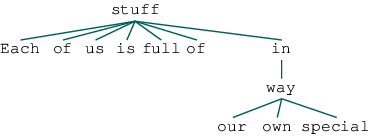

In [26]:
import nltk
mp = nltk.parse.malt.MaltParser(os.getcwd(),
                                model_filename="engmalt.linear-1.7.mco")
res = mp.parse_one(sent.split())
res.tree()

In [23]:
list(res.triples())

[(('stuff', 'NN'), 'nn', ('Each', 'NN')),
 (('stuff', 'NN'), 'nn', ('of', 'NN')),
 (('stuff', 'NN'), 'nn', ('us', 'NNS')),
 (('stuff', 'NN'), 'nn', ('is', 'NNS')),
 (('stuff', 'NN'), 'nn', ('full', 'NN')),
 (('stuff', 'NN'), 'nn', ('of', 'NN')),
 (('stuff', 'NN'), 'prep', ('in', 'IN')),
 (('in', 'IN'), 'pobj', ('way', 'NN')),
 (('way', 'NN'), 'nn', ('our', 'NN')),
 (('way', 'NN'), 'nn', ('own', 'NN')),
 (('way', 'NN'), 'nn', ('special', 'NN'))]

## Pattern 

In [ ]:
from pattern.en import parse, pprint

s = parse(sent,
     tokenize = True,  # Tokenize the input, i.e. split punctuation from words.
         tags = True,  # Find part-of-speech tags.
       chunks = True,  # Find chunk tags, e.g. "the black cat" = NP = noun phrase.
    relations = True,  # Find relations between chunks.
      lemmata = True,  # Find word lemmata.
        light = False) 
pprint(s)

## spaCy 

In [ ]:
from spacy.en import English
parser = English()
parsedData = parser(sent)


In [38]:
from spacy.en import English
parser = English()
parsedData = parser(sent)
for i, token in enumerate(parsedData):
    print("original:", token.orth, token.orth_)
    print("lowercased:", token.lower, token.lower_)
    print("lemma:", token.lemma, token.lemma_)
    print("shape:", token.shape, token.shape_)
    print("prefix:", token.prefix, token.prefix_)
    print("suffix:", token.suffix, token.suffix_)
    print("log probability:", token.prob)
    print("Brown cluster id:", token.cluster)
    print("----------------------------------------")
    if i > 2:
        break

original: 1377 oh
lowercased: 1377 oh
lemma: 0 
shape: 653 xx
prefix: 1306 o
suffix: 1377 oh
log probability: 0.0
Brown cluster id: 0
----------------------------------------
original: 1378 god
lowercased: 1378 god
lemma: 0 
shape: 839 xxx
prefix: 1291 g
suffix: 1378 god
log probability: 0.0
Brown cluster id: 0
----------------------------------------
original: 559 I
lowercased: 957 i
lemma: 0 
shape: 99 X
prefix: 559 I
suffix: 559 I
log probability: 0.0
Brown cluster id: 0
----------------------------------------
original: 1379 sound
lowercased: 1379 sound
lemma: 0 
shape: 1280 xxxx
prefix: 945 s
suffix: 1380 und
log probability: 0.0
Brown cluster id: 0
----------------------------------------


In [39]:

doc = parser(u'They told us to duck.')
for word in doc:
    print(word.text, word.lemma, word.lemma_, word.tag, word.tag_, word.pos, word.pos_)

They 0  0  0 
told 0  0  0 
us 0  0  0 
to 0  0  0 
duck 0  0  0 
. 0  0  0 


<a href="https://demos.explosion.ai/displacy/?full=Each of us is full of stuff in our own special way. We are all shitty little snowflakes dancing in the universe." target="_new">Interactive Example</a>

# Word Langauge Graph 

In [ ]:
from visualize_word_graph import draw_graph  
draw_graph("dog")

In [ ]:
draw_graph("noise", hypernym=True)

#  Alice's Yelp Data

In [29]:
bad_sounds =['The sound in the place is terrible.',
            'dining with clatter and the occasional smell of BMW exausts',
            'Also, the acoustics are not conducive to having any sort of conversation.']
not_bad_sounds = ["not to sound like a snob",
                  "at your table and you can tune the sound to whichever game you're interested in",
                  "oh god I sound old!"]

## 1. parts of speach for each

In [32]:
from pattern.en import parse, pprint

def print_parts(sents):
    for sent in sents:
        s = parse(sent,
             tokenize = True,  # Tokenize the input, i.e. split punctuation from words.
                 tags = True,  # Find part-of-speech tags.
               chunks = True,  # Find chunk tags, e.g. "the black cat" = NP = noun phrase.
            relations = True,  # Find relations between chunks.
              lemmata = True,  # Find word lemmata.
                light = False) 
        print( sent )
        pprint(s)
sents = bad_sounds + not_bad_sounds
print_parts(bad_sounds + not_bad_sounds)

The sound in the place is terrible.
          WORD   TAG    CHUNK   ROLE   ID     PNP    LEMMA      
                                                                
           The   DT     NP      -      -      -      the        
         sound   NN     NP ^    -      -      -      sound      
            in   IN     PP      -      -      PNP    in         
           the   DT     NP      SBJ    1      PNP    the        
         place   NN     NP ^    SBJ    1      PNP    place      
            is   VBZ    VP      -      1      -      be         
      terrible   JJ     ADJP    -      -      -      terrible   
             .   .      -       -      -      -      .          
dining with clatter and the occasional smell of BMW exausts
          WORD   TAG       CHUNK   ROLE   ID     PNP    LEMMA        
                                                                     
        dining   VBG       VP      -      -      -      dine         
          with   IN        PP      -      - 

Penn Treebank Project Chunks <a href="tagguide.pdf">guide</a>

#### parts

<table class="border">
<tbody>
<tr>
<td><span class="smallcaps">Tag </span></td>
<td><span class="smallcaps">Description </span></td>
<td class="smallcaps">Example</td>
</tr>
<tr>
<td><span class="postag">CC </span></td>
<td>conjunction, coordinating</td>
<td><em>and, or, but</em></td>
</tr>
<tr>
<td><span class="postag">CD </span></td>
<td>cardinal number</td>
<td><em>five, three, 13%</em></td>
</tr>
<tr>
<td><span class="postag">DT </span></td>
<td>determiner</td>
<td><em>the, a, these <br></em></td>
</tr>
<tr>
<td><span class="postag">EX </span></td>
<td>existential there</td>
<td><em><span style="text-decoration: underline;">there</span> were six boys <br></em></td>
</tr>
<tr>
<td><span class="postag">FW </span></td>
<td>foreign word</td>
<td><em>mais <br></em></td>
</tr>
<tr>
<td><span class="postag">IN </span></td>
<td>conjunction, subordinating or preposition</td>
<td><em>of, on, before, unless <br></em></td>
</tr>
<tr>
<td><span class="postag">JJ </span></td>
<td>adjective</td>
<td><em>nice, easy </em></td>
</tr>
<tr>
<td><span class="postag">JJR </span></td>
<td>adjective, comparative</td>
<td><em>nicer, easier</em></td>
</tr>
<tr>
<td><span class="postag">JJS </span></td>
<td>adjective, superlative</td>
<td><em>nicest, easiest <br></em></td>
</tr>
<tr>
<td><span class="postag">LS </span></td>
<td>list item marker</td>
<td><em>&nbsp;</em></td>
</tr>
<tr>
<td><span class="postag">MD </span></td>
<td>verb, modal auxillary</td>
<td><em>may, should <br></em></td>
</tr>
<tr>
<td><span class="postag">NN </span></td>
<td>noun, singular or mass</td>
<td><em>tiger, chair, laughter <br></em></td>
</tr>
<tr>
<td><span class="postag">NNS </span></td>
<td>noun, plural</td>
<td><em>tigers, chairs, insects <br></em></td>
</tr>
<tr>
<td><span class="postag">NNP </span></td>
<td>noun, proper singular</td>
<td><em>Germany, God, Alice <br></em></td>
</tr>
<tr>
<td><span class="postag">NNPS </span></td>
<td>noun, proper plural</td>
<td><em>we met two <span style="text-decoration: underline;">Christmases</span> ago <br></em></td>
</tr>
<tr>
<td><span class="postag">PDT </span></td>
<td>predeterminer</td>
<td><em><span style="text-decoration: underline;">both</span> his children <br></em></td>
</tr>
<tr>
<td><span class="postag">POS</span></td>
<td>possessive ending</td>
<td><em>'s</em></td>
</tr>
<tr>
<td><span class="postag">PRP </span></td>
<td>pronoun, personal</td>
<td><em>me, you, it <br></em></td>
</tr>
<tr>
<td><span class="postag">PRP&#36; </span></td>
<td>pronoun, possessive</td>
<td><em>my, your, our <br></em></td>
</tr>
<tr>
<td><span class="postag">RB </span></td>
<td>adverb</td>
<td><em>extremely, loudly, hard&nbsp; <br></em></td>
</tr>
<tr>
<td><span class="postag">RBR </span></td>
<td>adverb, comparative</td>
<td><em>better <br></em></td>
</tr>
<tr>
<td><span class="postag">RBS </span></td>
<td>adverb, superlative</td>
<td><em>best <br></em></td>
</tr>
<tr>
<td><span class="postag">RP </span></td>
<td>adverb, particle</td>
<td><em>about, off, up <br></em></td>
</tr>
<tr>
<td><span class="postag">SYM </span></td>
<td>symbol</td>
<td><em>&#37; <br></em></td>
</tr>
<tr>
<td><span class="postag">TO </span></td>
<td>infinitival to</td>
<td><em>what <span style="text-decoration: underline;">to</span> do? <br></em></td>
</tr>
<tr>
<td><span class="postag">UH </span></td>
<td>interjection</td>
<td><em>oh, oops, gosh <br></em></td>
</tr>
<tr>
<td><span class="postag">VB </span></td>
<td>verb, base form</td>
<td><em>think <br></em></td>
</tr>
<tr>
<td><span class="postag">VBZ </span></td>
<td>verb, 3rd person singular present</td>
<td><em>she <span style="text-decoration: underline;">thinks </span><br></em></td>
</tr>
<tr>
<td><span class="postag">VBP </span></td>
<td>verb, non-3rd person singular present</td>
<td><em>I <span style="text-decoration: underline;">think </span><br></em></td>
</tr>
<tr>
<td><span class="postag">VBD </span></td>
<td>verb, past tense</td>
<td><em>they <span style="text-decoration: underline;">thought </span><br></em></td>
</tr>
<tr>
<td><span class="postag">VBN </span></td>
<td>verb, past participle</td>
<td><em>a <span style="text-decoration: underline;">sunken</span> ship <br></em></td>
</tr>
<tr>
<td><span class="postag">VBG </span></td>
<td>verb, gerund or present participle</td>
<td><em><span style="text-decoration: underline;">thinking</span> is fun <br></em></td>
</tr>
<tr>
<td><span class="postag">WDT </span></td>
<td><em>wh</em>-determiner</td>
<td><em>which, whatever, whichever <br></em></td>
</tr>
<tr>
<td><span class="postag">WP </span></td>
<td><em>wh</em>-pronoun, personal</td>
<td><em>what, who, whom <br></em></td>
</tr>
<tr>
<td><span class="postag">WP$$</span></td>
<td><em>wh</em>-pronoun, possessive</td>
<td><em>whose, whosever <br></em></td>
</tr>
<tr>
<td><span class="postag">WRB</span></td>
<td><em>wh</em>-adverb</td>
<td><em>where, when <br></em></td>
</tr>
<tr>
<td><span class="postag">. </span></td>
<td>punctuation mark, sentence closer</td>
<td><em>.;?* <br></em></td>
</tr>
<tr>
<td><span class="postag">, </span></td>
<td>punctuation mark, comma</td>
<td><em>, <br></em></td>
</tr>
<tr>
<td><span class="postag">: </span></td>
<td>punctuation mark, colon</td>
<td><em>: <br></em></td>
</tr>
<tr>
<td><span class="postag">( </span></td>
<td>contextual separator, left paren</td>
<td><em>( <br></em></td>
</tr>
<tr>
<td><span class="postag">) </span></td>
<td>contextual separator, right paren</td>
<td><em>) <br></em></td>
</tr>
</tbody>
</table>

#### chunks

<table class="border">
<tbody>
<tr>
<td><span class="smallcaps">Tag </span></td>
<td><span class="smallcaps">Description </span></td>
<td><span class="smallcaps">Words </span></td>
<td><span class="smallcaps">Example </span></td>
<td align="right">%</td>
</tr>
<tr>
<td><span class="postag">NP </span></td>
<td>noun phrase<span class="postag">&nbsp;</span></td>
<td><span class="postag">DT</span>+<span class="postag">RB</span>+<span class="postag">JJ</span>+<span class="postag">NN</span> + <span class="postag">PR</span></td>
<td><em>the strange bird</em></td>
<td align="right">&nbsp;51</td>
</tr>
<tr>
<td><span class="postag">PP </span></td>
<td>prepositional phrase</td>
<td><span class="postag">TO</span>+<span class="postag">IN </span></td>
<td><em>in between</em></td>
<td align="right">&nbsp;19</td>
</tr>
<tr>
<td><span class="postag">VP&nbsp; </span></td>
<td>verb phrase&nbsp;</td>
<td><span class="postag">RB</span>+<span class="postag">MD</span>+<span class="postag">VB&nbsp; </span></td>
<td><em>was looking<br></em></td>
<td align="right">9</td>
</tr>
<tr>
<td><span class="postag">ADVP</span></td>
<td>adverb phrase</td>
<td><span class="postag">RB</span></td>
<td><em>also<br></em></td>
<td align="right">&nbsp;6</td>
</tr>
<tr>
<td><span class="postag">ADJP</span></td>
<td>adjective phrase<span class="postag">&nbsp;</span></td>
<td><span class="postag">CC</span>+<span class="postag">RB</span>+<span class="postag">JJ</span></td>
<td><em>warm and cosy</em></td>
<td align="right">&nbsp;3</td>
</tr>
<tr>
<td><span class="postag">SBAR</span></td>
<td>subordinating conjunction&nbsp;</td>
<td><span class="postag">IN</span></td>
<td><em><span style="text-decoration: underline;">whether</span> or not<br></em></td>
<td align="right">3</td>
</tr>
<tr>
<td><span class="postag">PRT </span></td>
<td>particle</td>
<td><span class="postag">RP</span></td>
<td><em><span style="text-decoration: underline;">up</span> the stairs</em></td>
<td align="right">&nbsp;1</td>
</tr>
<tr>
<td><span class="postag">INTJ</span></td>
<td>interjection</td>
<td><span class="postag">UH</span></td>
<td><em>hello</em><em><br></em></td>
<td align="right">&nbsp;0</td>
</tr>
</tbody>
</table>

## 2. seach for patterns

In [33]:
from pattern.en import parsetree
from pattern.search import search

for sent in sents:
    t = parsetree(sent)

    print( sent )
    print( "Tagged Sent:", t )
    print( "Verbs:", search('VB*', t) ) # verbs
    print( "ADJP:", search('ADJP', t) ) # verbs   
    print( "Nouns:", search('NN', t) ) # all nouns

The sound in the place is terrible.
Tagged Sent: [Sentence("The/DT/B-NP/O sound/NN/I-NP/O in/IN/B-PP/B-PNP the/DT/B-NP/I-PNP place/NN/I-NP/I-PNP is/VBZ/B-VP/O terrible/JJ/B-ADJP/O ././O/O")]
Verbs: [Match(words=[Word('is/VBZ')])]
ADJP: [Match(words=[Word('terrible/JJ')])]
Nouns: [Match(words=[Word('sound/NN')]), Match(words=[Word('place/NN')])]
dining with clatter and the occasional smell of BMW exausts
Tagged Sent: [Sentence("dining/VBG/B-VP/O with/IN/B-PP/B-PNP clatter/NN/B-NP/I-PNP and/CC/I-NP/I-PNP the/DT/I-NP/I-PNP occasional/JJ/I-NP/I-PNP smell/NN/I-NP/I-PNP of/IN/B-PP/B-PNP BMW/NNP-ORG/B-NP/I-PNP exausts/VBZ/B-VP/O")]
Verbs: [Match(words=[Word('dining/VBG')]), Match(words=[Word('exausts/VBZ')])]
ADJP: []
Nouns: [Match(words=[Word('clatter/NN')]), Match(words=[Word('smell/NN')])]
Also, the acoustics are not conducive to having any sort of conversation.
Tagged Sent: [Sentence("Also/RB/B-ADVP/O ,/,/O/O the/DT/B-NP/O acoustics/NNS/I-NP/O are/VBP/B-VP/O not/RB/B-ADJP/O conducive/JJ/I

## 3. create similar word list (stemming + synsets)

In [ ]:
from nltk.corpus import wordnet as wn
from pattern.en import parsetree
from pattern.search import taxonomy, WordNetClassifier, search

taxonomy.classifiers.append(WordNetClassifier())

def get_parts(word, pos, recursive=False):
    parts = [word, ]
    parts += taxonomy.children(word, pos=pos, recursive=recursive)
    parts += taxonomy.parents(word, pos=pos, recursive=recursive)
    return parts

def word_search(t, word, pos):
    parts = get_parts(word, pos)
    results = search(pos, t)
    for result in results:
        #  print result.string, parts
        if any(x in result.string.split() for x in parts):
            return True
    return False

def run_a_rule(sent, word, pos):
    t = parsetree(sent)
    return word_search(t, word, pos)


## 3. test

In [ ]:
print "1. 'sound' is a NN"
print run_a_rule(sents[0], 'noise', 'NN')

print "2. clatter is a NN"
print run_a_rule(sents[1], 'noise', 'NN')

print "3. acoustics is NNS and RB Not"
print run_a_rule(sents[2], 'acoustics', 'NNS') and run_a_rule(sents[2], 'not', 'RB')

print "4. sound is a VB"
print run_a_rule(sents[3], 'noise', 'VB*') 

print "5. Sounds is JJ"
print run_a_rule(sents[4], 'sound', 'JJ') 

print "6. sound is VBP"
print run_a_rule(sents[5], 'noise', 'VB*')

## 4. create a feature extractor function

In [ ]:
def ext_func(tgt):
    return bool(not (run_a_rule(tgt, 'noise', 'VB*') and not run_a_rule(tgt, 'sound', 'JJ'))
                and (run_a_rule(tgt, 'noise', 'NN') or run_a_rule(tgt, 'acoustics', 'NNS') or
                        (run_a_rule(tgt, 'acoustics', 'NNS') and run_a_rule(tgt, 'not', 'RB'))))
        
print "bad noises in review:"
for sent in bad_sounds:
    print "\t" + sent
    assert(ext_func(sent) == True)
print
print "no mention of bad noises:"
for sent in not_bad_sounds:
    print "\t" + sent
    assert(ext_func(sent) == False)


# Machine Learning Example 

In [ ]:
import zipfile
import pickle
from lxml import etree
from StringIO import StringIO

zf = zipfile.ZipFile('nhtsa_as_xml.zip', 'r')
nhtsa_injured = zf.read('nhtsa_injured.xml')
nhtsa_not_injured = zf.read('nhtsa_not_injured.xml')
xml_injured = etree.parse(StringIO(nhtsa_injured))
xml_not_injured = etree.parse(StringIO(nhtsa_not_injured))


def injured(l):
    return ['0' != str(x) and 'injured' or 'notinjured' for x in l]


def data(x):
    out = [x.xpath("//rows/row/@c1"),
           injured(x.xpath("//rows/row/@c8")),
           x.xpath("//rows/row/@c2")]
    return list(reversed(zip(*out)))


xml_injured_data = data(xml_injured)[:800]
xml_not_injured_data = data(xml_not_injured)[:800]

In [ ]:
xml_injured_data[0]

In [ ]:
from visualize_word_graph import draw_graph  
draw_graph("injury")

In [ ]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from pattern.search import taxonomy, search

taxonomy.append('dislocated', type='injury')
taxonomy.append('sustained', type='injury')
taxonomy.append('burn', type='injury')
taxonomy.append('injury', type='hurt')


def check_sustained(text):
    if len(search('HURT', text)) > 0:
        return True
    return False


def feats(text):
    words = text.replace(".", "").split()
    out = dict([(word, True) for word in words])
    if 'SUSTAINED' in out:
        del out['SUSTAINED']
    out['rule(SUSTAINED)'] = check_sustained(text)
    return out
    
negcutoff = len(xml_not_injured_data)*3/4
poscutoff = len(xml_injured_data)*3/4
 
not_inj_data = xml_not_injured_data[:negcutoff] + xml_injured_data[:poscutoff]
inj_data = xml_not_injured_data[negcutoff:] + xml_injured_data[poscutoff:]    
    
negfeats = [(feats(f[2]), 'not') for f in not_inj_data]
posfeats = [(feats(f[2]), 'injure') for f in inj_data]
egcutoff = len(negfeats)*3/4
poscutoff = len(posfeats)*3/4
 
trainfeats = negfeats[:negcutoff] + posfeats[:poscutoff]
testfeats = negfeats[negcutoff:] + posfeats[poscutoff:]
print 'train on %d instances, test on %d instances' % (len(trainfeats), len(testfeats))
 
classifier = NaiveBayesClassifier.train(trainfeats)
print 'accuracy:', nltk.classify.util.accuracy(classifier, testfeats)
classifier.show_most_informative_features(n=100)


classifier.classify(feats("HE SUSTAINED INJURY"))


# POSH Syntax Overview 

converts:

    return bool(not (run_a_rule(tgt, 'noise', 'VB*') and not run_a_rule(tgt, 'sound', 'JJ'))
                and (run_a_rule(tgt, 'noise', 'NN') or run_a_rule(tgt, 'acoustics', 'NNS') or
                        (run_a_rule(tgt, 'acoustics', 'NNS') and run_a_rule(tgt, 'not', 'RB'))))

To:

    SENT: !VB*(noise+3) and !JJ(sound+3) ) and (NN(noise+2) | NNS(acoustics) | (NNS(acoustics) & RB(not)))
  


# Google Cloud Natural Language API

Helpful tutorial on Google API(s) https://www.programmableweb.com/news/how-to-start-using-google-cloud-natural-language-api/how-to/2016/09/01#apiu

In [ ]:
from googleapiclient import discovery
import httplib2
from oauth2client.client import GoogleCredentials
import os

os.environ['GOOGLE_APPLICATION_CREDENTIALS']  =  os.path.expanduser("~/my_key_from_google.json")

DISCOVERY_URL = ('https://{api}.googleapis.com/'
                '$discovery/rest?version={apiVersion}')

http = httplib2.Http()

credentials = GoogleCredentials.get_application_default().create_scoped(
 ['https://www.googleapis.com/auth/cloud-platform'])

http=httplib2.Http()
credentials.authorize(http)

service = discovery.build('language', 'v1beta1',
                       http=http, discoveryServiceUrl=DISCOVERY_URL)

service_request = service.documents().analyzeSyntax(
body={
 'document': {
    'type': 'PLAIN_TEXT',
    'content': sent
 }
})

response = service_request.execute()

for token in response['tokens']:
    print("{} -> {}".format(token['text']['content'],token['partOfSpeech']['tag']))

In [ ]:
response['tokens'][0]['partOfSpeech']

# POSH Library 

Comming soon to: https://github.com/brianray/posh


<img src="files/me.png">
### About Me


* Deloitte Enterprise Science brray (at) deloitte  dot com
* ChiPy (Chicago Python User Group) brianhray@gmail.com
* LinkedIn: https://www.linkedin.com/in/brianray
* Twitter: <a href="https://twitter.com/brianray" class="twitter-follow-button" data-show-count="false" data-size="large">Follow @brianray</a>
<script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>

Copy of this presentation found here: https://github.com/brianray/puppy_dec_2015